## Abordagem Utilizando SVM: Bibliotecas

Para resolver esse problema utilizando SVM e conseguir plotar as curvas de decisão e a matriz de confusão foram utilizadas as seguintes bibliotecas:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import confusion_matrix
import itertools

## Funções Utilizadas

A seguir, todas as funções utilizadas na solução do problema.

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confução normalizada")
    else:
        print('Matriz de confusão sem normalização')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Rótulo verdadeiros')
    plt.xlabel('Rótulo estimados')
    plt.tight_layout()

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = - 1, 1
    y_min, y_max = - 1, 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_real_curve():
    x1 = np.linspace(-1,1,100)
    y1 = np.sqrt(1-x1**2) - 1
    
    y2 = np.linspace(-1,1,100)
    x2 = -np.sqrt(1-y2**2) + 1
    
    x3 = np.linspace(-1,1,100)
    y3 = -np.sqrt(1-x3**2) + 1
    
    y4 = np.linspace(-1,1,100)
    x4 = np.sqrt(1-y4**2) - 1
    
    plt.plot(x1,y1) #C1
    plt.plot(x2,y2) #C2
    plt.plot(x3,y3) #C3
    plt.plot(x4,y4) #C4
    
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

#Gerar o plot das funções
def Curve1(x, y): #Retorna True se o ponto (x,y) está abaixo da curva Curve1
    y1 = np.sqrt(1-x**2) - 1
    if y1 > y:
        return True
    else:
        return False
    
def Curve2(x, y): #Retorna True se o ponto (x,y) está abaixo da curva Curve2
    x2 = -np.sqrt(1-y**2) + 1
    if x > x2:
        return True
    else:
        return False

def Curve3(x, y): #Retorna True se o ponto (x,y) está abaixo da curva Curve3
    y3 = -np.sqrt(1-x**2) + 1
    if y > y3:
        return True
    else:
        return False

def Curve4(x, y): #Retorna True se o ponto (x,y) está abaixo da curva Curve4
    x4 = np.sqrt(1-y**2) - 1
    if x4 > x:
        return True
    else:
        return False
    
#Rotulação
def rotulo(training_data):
    C = np.zeros(4)
    class_training_data = np.array([])
    for i in range(len(training_data)):
        C[0] = Curve1(training_data[i][0],training_data[i][1])
        C[1] = Curve2(training_data[i][0],training_data[i][1])
        C[2] = Curve3(training_data[i][0],training_data[i][1])
        C[3] = Curve4(training_data[i][0],training_data[i][1])
        
        if C[0] and C[3]:
            class_training_data = np.append(class_training_data,0)
        elif C[0] and C[1]:
            class_training_data = np.append(class_training_data,1)
        elif C[1] and C[2]:
            class_training_data = np.append(class_training_data,2)
        elif C[2] and C[3]:
            class_training_data = np.append(class_training_data,3)
        else:
            class_training_data = np.append(class_training_data,4)
    return class_training_data

## Dados de Treino

O primeiro passo é a geração de dados de treino para que a SVM retorne os vetores de suporte e as curvas que separam as classes.

In [3]:
#Geração de dados
length = 1000
training_data = np.zeros((length,2))
for i in range(length):
    training_data[i][0] = np.random.uniform(-1,1) #x_training_data
    training_data[i][1] = np.random.uniform(-1,1) #y_training_data
    
X = training_data
class_training_data = rotulo(training_data)
y = class_training_data

## Solução do Problema

Após vários testes, o kernel que teve melhor desempenho foi o RBF (Radial Basis Function). O parâmetro $C$, como já citado na parte sobre SVM na questão 1, é o fator de penalização do erro. Aqui um valor de $C$ muito baixo, como por exemplo $C = 1$ resulta em um resultado pouco preciso, por isso escolheu-se o valor de $C = 10000$ e obteve-se uma precisão de 97% em média. Contudo, aumentar o valor de $C$ além do estabelecido abaixo não melhora significativamente a precisão da resposta.

In [4]:
clf = svm.SVC(kernel='rbf', C=10000)
clf.fit(X, y)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

O próximo passo é gerar os dados de validação e checar a precisão da rede. Essa checagem será feita de forma visual, com o plot dos dados de validação e das curvas que definem as classes, e por meio da matriz de confusão. A geração dos dados de validação e a matriz de confusão estão no trecho de código abaixo.

Precisão de: 97.729%
MATRIZ DE CONFUSÃO
Matriz de confusão sem normalização
[[14356     0     0     3   143]
 [   21 13920     0     0   320]
 [    0     0 13949     0    95]
 [    0     0     8 14107   343]
 [  403   308   342   285 41397]]


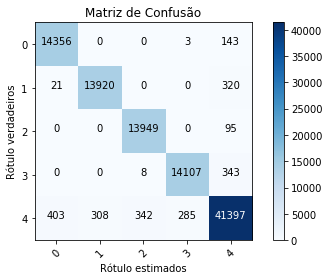

In [5]:
N = 100000
test_data = np.zeros((N,2))
predict_data = np.zeros((N,2))
for i in range(N):
    test_data[i][0] = np.random.uniform(-1,1) #x_test_data
    test_data[i][1] = np.random.uniform(-1,1) #y_test_data

predict_data = clf.predict(test_data)
real_class_data = rotulo(test_data)

acc = 0
for i in range(N):
    if predict_data[i] == real_class_data[i]:
        acc = acc + 1
print('Precisão de: ' + str(acc*100/N) + '%')
print('MATRIZ DE CONFUSÃO')
cm = confusion_matrix(real_class_data, predict_data)

plt.figure()
plot_confusion_matrix(cm, ['0','1','2','3','4'])
plt.show()


O plot dos pontos gerados aleatoriamente para validação assim como as curvas que definem as classes e a região de decisão retornada pela SVM podem ser vistas abaixo.

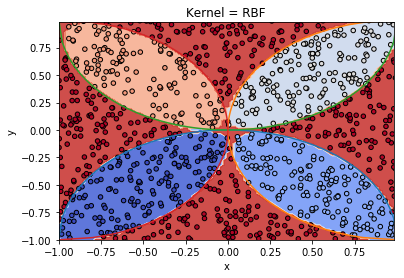

In [6]:
ax = plt.gca()

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.9)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Kernel = RBF')

plot_real_curve()
plt.show()

Agora, utilizando diferentes valores de $C$, como por exemplo, $C = 1$ o resultado é o seguinte:

Precisão de: 78.551%
MATRIZ DE CONFUSÃO
Matriz de confusão sem normalização
[[14296     0     0     0     0]
 [  238 13953     0     0   157]
 [    9     0 13321     2   733]
 [  447     0     0 12082  1658]
 [ 6320  4354  4464  3067 24899]]


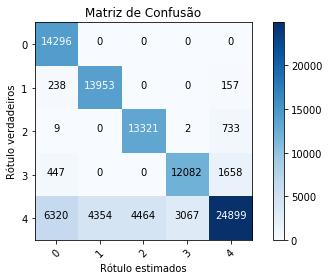

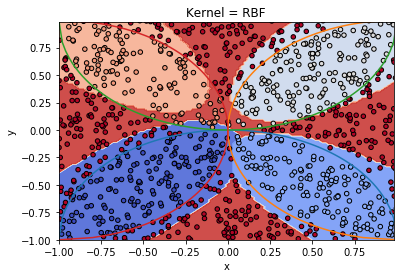

In [7]:
clf = svm.SVC(kernel='rbf', C=1)
clf.fit(X, y)

N = 100000
test_data = np.zeros((N,2))
predict_data = np.zeros((N,2))
for i in range(N):
    test_data[i][0] = np.random.uniform(-1,1) #x_test_data
    test_data[i][1] = np.random.uniform(-1,1) #y_test_data

predict_data = clf.predict(test_data)
real_class_data = rotulo(test_data)

acc = 0
for i in range(N):
    if predict_data[i] == real_class_data[i]:
        acc = acc + 1
print('Precisão de: ' + str(acc*100/N) + '%')
print('MATRIZ DE CONFUSÃO')
cm = confusion_matrix(real_class_data, predict_data)

plt.figure()
plot_confusion_matrix(cm, ['0','1','2','3','4'])
plt.show()

ax = plt.gca()

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.9)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Kernel = RBF')

plot_real_curve()
plt.show()

Agora com $C=1$ e kernel sigmoid

Precisão de: 41.34%
MATRIZ DE CONFUSÃO
Matriz de confusão sem normalização
[[    0     0     0     0 14352]
 [    0  6123     0     0  8140]
 [    0     0  6428     0  7929]
 [    0     0     0     0 14203]
 [  733  5973  7330     0 28789]]


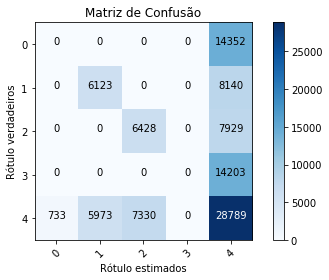

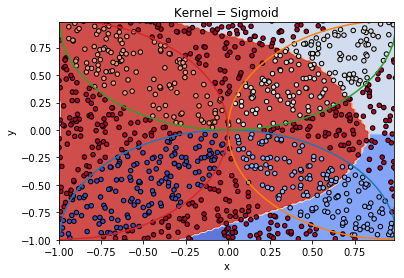

In [8]:
clf = svm.SVC(kernel='sigmoid', C=1)
clf.fit(X, y)

N = 100000
test_data = np.zeros((N,2))
predict_data = np.zeros((N,2))
for i in range(N):
    test_data[i][0] = np.random.uniform(-1,1) #x_test_data
    test_data[i][1] = np.random.uniform(-1,1) #y_test_data

predict_data = clf.predict(test_data)
real_class_data = rotulo(test_data)

acc = 0
for i in range(N):
    if predict_data[i] == real_class_data[i]:
        acc = acc + 1
print('Precisão de: ' + str(acc*100/N) + '%')
print('MATRIZ DE CONFUSÃO')
cm = confusion_matrix(real_class_data, predict_data)

plt.figure()
plot_confusion_matrix(cm, ['0','1','2','3','4'])
plt.show()

ax = plt.gca()

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.9)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Kernel = Sigmoid')

plot_real_curve()
plt.show()

Com Kernel linear e $C = 1$ obtem-se o seguinte:

Precisão de: 49.472%
MATRIZ DE CONFUSÃO
Matriz de confusão sem normalização
[[ 4391     0     0     0  9766]
 [    0  5908     0     0  8217]
 [    0     0  6063     0  8109]
 [    0     0     0     0 14197]
 [ 2328  3887  4024     0 33110]]


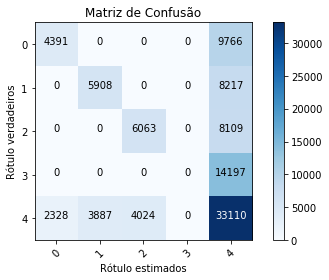

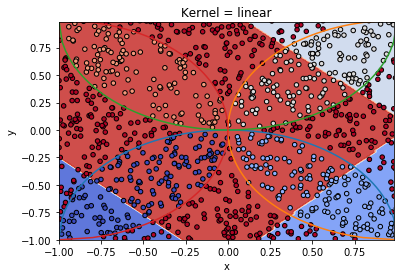

In [9]:
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)

N = 100000
test_data = np.zeros((N,2))
predict_data = np.zeros((N,2))
for i in range(N):
    test_data[i][0] = np.random.uniform(-1,1) #x_test_data
    test_data[i][1] = np.random.uniform(-1,1) #y_test_data

predict_data = clf.predict(test_data)
real_class_data = rotulo(test_data)

acc = 0
for i in range(N):
    if predict_data[i] == real_class_data[i]:
        acc = acc + 1
print('Precisão de: ' + str(acc*100/N) + '%')
print('MATRIZ DE CONFUSÃO')
cm = confusion_matrix(real_class_data, predict_data)

plt.figure()
plot_confusion_matrix(cm, ['0','1','2','3','4'])
plt.show()

ax = plt.gca()

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.9)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Kernel = linear')

plot_real_curve()
plt.show()

E por último, kernel linear e $C = 10000$ para comparar com o bom desempenho do kernel RBF utilizando o mesmo $C$.

Precisão de: 49.319%
MATRIZ DE CONFUSÃO
Matriz de confusão sem normalização
[[ 4893     0     0     0  9424]
 [    0  6094     0     0  8249]
 [    0     0  6189     0  7978]
 [    0     0     0     0 14202]
 [ 2674  3911  4243     0 32143]]


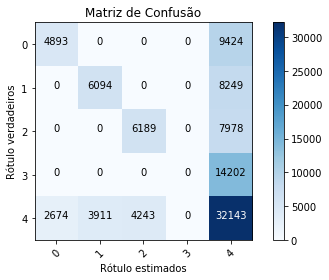

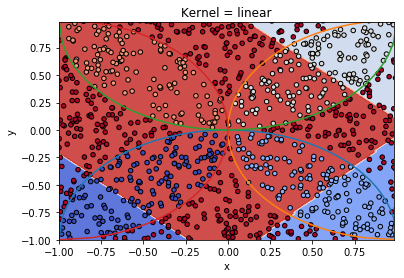

In [10]:
clf = svm.SVC(kernel='linear', C=10000)
clf.fit(X, y)

N = 100000
test_data = np.zeros((N,2))
predict_data = np.zeros((N,2))
for i in range(N):
    test_data[i][0] = np.random.uniform(-1,1) #x_test_data
    test_data[i][1] = np.random.uniform(-1,1) #y_test_data

predict_data = clf.predict(test_data)
real_class_data = rotulo(test_data)

acc = 0
for i in range(N):
    if predict_data[i] == real_class_data[i]:
        acc = acc + 1
print('Precisão de: ' + str(acc*100/N) + '%')
print('MATRIZ DE CONFUSÃO')
cm = confusion_matrix(real_class_data, predict_data)

plt.figure()
plot_confusion_matrix(cm, ['0','1','2','3','4'])
plt.show()

ax = plt.gca()

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.9)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Kernel = linear')

plot_real_curve()
plt.show()